In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from ecephys.sglx_utils import load_timeseries
from ecephys.graham import channel_groups, paths

In [95]:
condition = "BL"
subject = "Eugene"

# chans = channel_groups.CA1[subject]
# chans = chans[0:11:2]
chans = channel_groups.full[subject]
bin_path = Path(paths.lfp_bin[condition][subject])
(times, sig, fs) = load_timeseries(bin_path, chans, start_time=(1256.7), end_time=(1256.7 + 0.5))

nChan: 385, nFileSamp: 9000025


In [89]:
# from ecephys.signal.ripples import apply_ripple_filter
# sig_filt = apply_ripple_filter(sig, fs)

In [6]:
from kcsd import KCSD1D

n_chans = len(chans)
intersite_distance = 0.020
ele_pos = np.linspace(0., (n_chans - 1) * intersite_distance, n_chans).reshape(n_chans, 1)
pots = sig[1, :].reshape(n_chans, 1)

In [7]:
k = KCSD1D(ele_pos, pots)
est_csd = k.values('CSD')

In [ ]:
k.cross_validate(Rs=np.linspace(0.01, 0.15, 15))
est_csd_val = k.values('CSD')

In [ ]:
_, ax = plt.subplots()
ax.plot(k.estm_x, est_csd, 'r')
ax.plot(k.estm_x, est_csd_val, 'g')
ax.plot(ele_pos, np.zeros_like(ele_pos), 'k.')

In [96]:
from kcsd import KCSD1D

n_chans = len(chans)
intersite_distance = 0.020
ele_pos = np.linspace(0., (n_chans - 1) * intersite_distance, n_chans).reshape(n_chans, 1)
pots = sig.T

In [97]:
k = KCSD1D(ele_pos, pots)
est_csd = k.values('CSD')

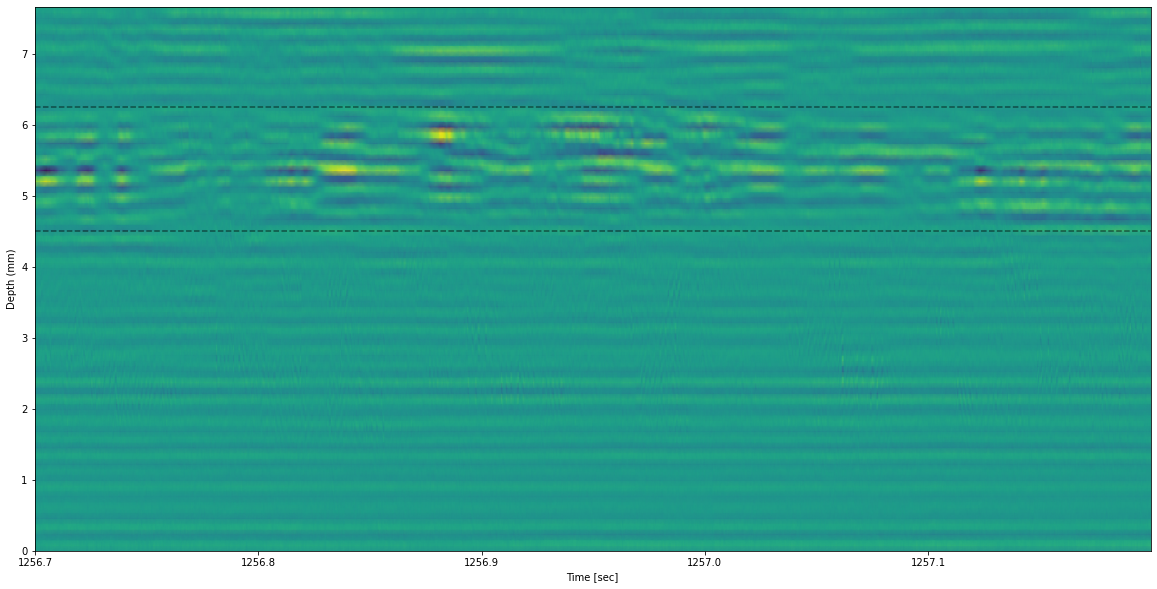

In [100]:
import matplotlib.cm as cm

_, ax = plt.subplots(figsize=(20, 10))
ax.pcolormesh(times, k.estm_x, est_csd, shading="gouraud")
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Depth (mm)")
ax.axhline(6.25, alpha=0.5, color='k', linestyle="--")
ax.axhline(4.5, alpha=0.5, color='k', linestyle="--")

In [101]:
chans[np.logical_and(ele_pos >= 4.5, ele_pos <= 6.25).flatten()]

array([ 67,  69,  71,  73,  75,  77,  79,  81,  83,  85,  87,  89,  91,
        93,  95,  97,  99, 101, 103, 105, 107, 109, 111, 113, 115, 117,
       119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143,
       145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169,
       171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195,
       197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221,
       223, 225, 227, 229, 231, 233, 235, 237, 239, 241])

In [102]:
np.where(np.logical_and(ele_pos >= 4.5, ele_pos <= 6.25).flatten())

(array([225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237,
        238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
        251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
        264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
        277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
        290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302,
        303, 304, 305, 306, 307, 308, 309, 310, 311, 312]),)

In [104]:
chans[225:313]

array([ 67,  69,  71,  73,  75,  77,  79,  81,  83,  85,  87,  89,  91,
        93,  95,  97,  99, 101, 103, 105, 107, 109, 111, 113, 115, 117,
       119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143,
       145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169,
       171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195,
       197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221,
       223, 225, 227, 229, 231, 233, 235, 237, 239, 241])

In [ ]:
k.cross_validate(Rs=np.linspace(0.01, 0.15, 15))
est_csd_val = k.values('CSD')

In [ ]:
_, ax = plt.subplots(figsize=(20, 10))
ax.pcolormesh(times, k.estm_x, est_csd_val, shading="gouraud")
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Depth (mm)")

In [13]:
# From AllenSDK
def compute_csd(trial_mean_lfp, spacing):
    '''Compute current source density for real or virtual channels from
    a neuropixels probe.
    Compute a second spatial derivative along the probe length
    as a 1D approximation of the Laplacian, after Pitts (1952).
    Parameters
    ----------
    trial_mean_lfp: numpy.ndarray
        LFP traces surrounding presentation of a common stimulus that
        have been averaged over trials. Dimensions are channels X time samples.
    spacing : float
        Distance between channels, in millimeters. This spacing may be
        physical distances between channels or a virtual distance if channels
        have been interpolated to new virtual positions.
    Returns
    -------
    Tuple[csd, csd_channels]:
        csd : numpy.ndarray
            Current source density. Dimensions are channels X time samples.
        csd_channels: numpy.ndarray
            Array of channel indices for CSD.
    '''

    # Need to pad lfp channels for Laplacian approx.
    padded_lfp = np.pad(trial_mean_lfp,
                        pad_width=((1, 1), (0, 0)),
                        mode='edge')

    csd = (1 / (spacing ** 2)) * (padded_lfp[2:, :]
                                  - (2 * padded_lfp[1:-1, :])
                                  + padded_lfp[:-2, :])
    
    csd_channels = np.arange(0, trial_mean_lfp.shape[0])
    
    return (csd, csd_channels)

In [27]:
est_csd_aibs, csd_channels_aibs = compute_csd(pots, intersite_distance)

Text(0, 0.5, 'Depth (mm)')

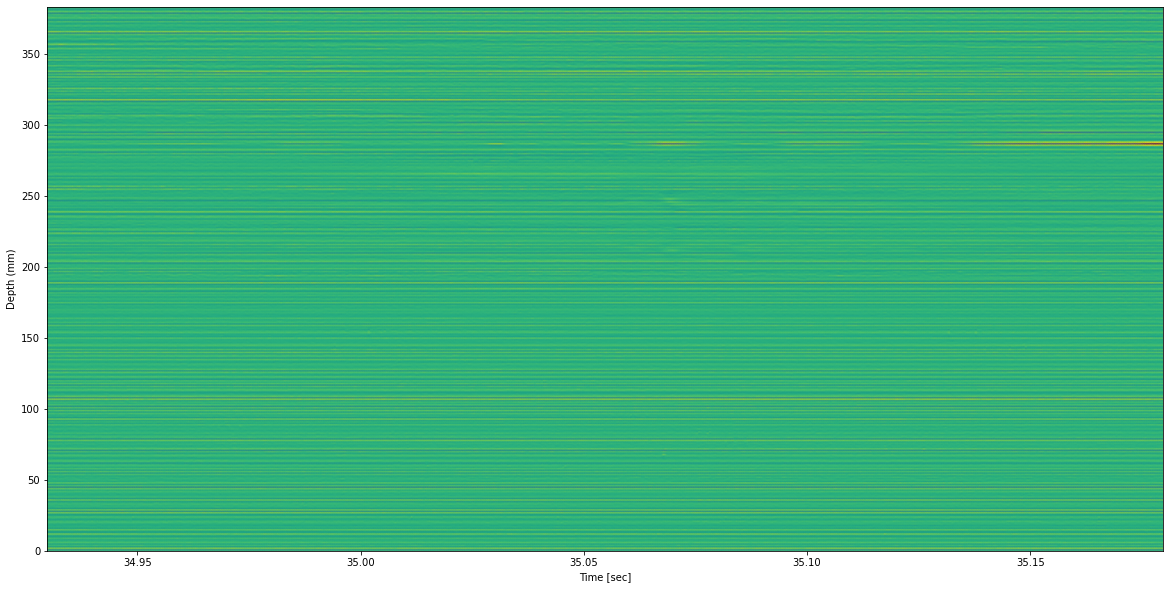

In [28]:
_, ax = plt.subplots(figsize=(20, 10))
ax.pcolormesh(times, csd_channels_aibs, est_csd_aibs, shading="gouraud")
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Depth (mm)")